## Simple Linear Regression Analysis

Econometric methods such as regression can help overcome the problem of complete uncertainty, guide planning and decision-making. Of course, building a model is not an easy task. Models shoudl meet certain criteria (for example, a model should not suffer from serial correlation) in order to be valid, and a lot of work is usually needed before we achieve a good model. Furthermore, much decision-making is required regarding which variables to include in the model. Too many may cause problems (unneeded variables misspecification), while too few may cause other problems (omitted variables misspecification or incorrect functional form).

The classical linear regression model is a way of examining the nature and form of the relationships between two or more variables. In this section we consider the case of only two variables. One important issue in the regression analysis is the direction of causation between the two varaibles; in other words, we want to know which variable is affecting the other. Alternatively, this can be stated as which variable depends on the other. Therefore we refer to the variable as the dependent variable (usually denoted by *y*) and the independent or explanatory variable (usually denoted by *x*). We want to explain / predict the value of *y* for different values of the explanatory variable *x*.

#### Topics:

- Simple Linear Regression
- Coefficients, Fitted Values, and Residuals
- Goodness of Fit
- Regression through the Origin and Regression on an Constant
- Expected Values, Variances, and Standard Errors
- Monte Carlo Simulations

### Simple OLS Regression:

We are concerned with estimating the population parameters $\beta_0$ and $\beta_1$ of the simple linear regrsssion model

$$y = \beta_0 + \beta_1 x + u$$

from a random sample of *y* and *x*. According to Wooldridge (2019, Section 2.2), the ordinary least squares (OLS) estimator are

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1 = \frac{Cov(x, y)}{Var(x)}$$

Based on these estimated parameters, the OLS regression line is 

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

For a given sample, we just need to calculate the four statistics $\bar{y}, \bar{x}, Cov(x, y), Var(x)$ and plug them into these equations. We alreayd know how to make these calculations in *Python*. Let's do it!

---

#### Wooldridge, Example 2.3: CEO Salary and Return on Equity

We are using the data set *CEOSAL1* we alreayd analyzed in the previous section. We consider the simple regression model

$$salary = \beta_0 + \beta_1 roe + u$$

where *salary* is the salary of a CEO in thousand dollars and *roe* is the return on investment in percent. We first load the modules and the data set. We also calculate the four statistics we need for the OLS formulas by hand. Finally, the parameter estimated are caculated. So the OLS regression line is

$$\hat{salary} = 963.1913 + 18.50119 \cdot roe$$

In [1]:
# Import modules
import wooldridge as woo
import numpy as np

In [2]:
# Load the CEOSAL1 data set and assign the variables
ceosal1 = woo.dataWoo('ceosal1')
x = ceosal1['roe']
y = ceosal1['salary']

In [3]:
# Calculate the statistics for OLS formulas:
cov_xy = np.cov(x, y)[1, 0]  # access 2nd row and 1st column of covariance matrix
var_x = np.var(x, ddof = 1)
x_bar = np.mean(x)
y_bar = np.mean(y)

In [4]:
# Manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print(f'Interception Coefficient: {b0}\n')
print(f'Slope Coefficient: {b1}\n')

Interception Coefficient: 963.1913364725577

Slope Coefficient: 18.50118634521493



While calculating OLS coefficients using this pedestrian approach is straightforward, there is a more convenient way to do it. Given the importance of OLS regression, it is not surprising that many *Python* modules have a specialized command to do the calculations automatically. In the following notebook, we will often use module **statsmodels** to apply linear regression and other econometric methods. More information about the module is provided by [Seabold and Perktold (2010)](https://conference.scipy.org/proceedings/scipy2010/pdfs/seabold.pdf). When working with statsmodels, the first line of code often is:

``` Python
import statsmodels.formula.api as smf
```

If the data frame sample contains the values of the dependent variable in column **y** and those of the regressor in the column **x**, we can calculate the OLS coefficients as

``` Python
reg = smf.ols(forumla = 'y ~ x', data = sample)
result = reg.fit()
```

The first argument **y ~ x** is called a **formula**. Essentially, it means that we want to model a left-hand-side variable **y** to be explained by a right-hand-side variable **x** in a linear fashion. We will discuss more general model forumlae in later section. In the second line of code, the actual calculation of OLS coefficients and many other results are performed by calling the method **fit()**.

Finally, all kind of results are assigned to the variable **result**. The name could of course be anything, for example **yummy_chocolate_chip_cookies**, but choosing intuitive variable names makes our life easier. As already mentioned, the referened object does not only include the OLS coefficients, but also information on the data source and much more we will get to know and use later on.

In the following example, we repeat the analysis we have already done manually. Besides the import of the data, there are only a few lines of code. The output shows how to access both estimated parameters with **result.params**: $\hat{\beta}_0$ is labeled **Intercept** and $\hat{\beta}_1$ is labeled with the name of the explanatory variable **roe**. The values are the same we already calculated excepted for different rounding in the ouptut.

In [5]:
# Import modules
import statsmodels.formula.api as smf

In [6]:
reg = smf.ols(formula = 'salary ~ roe', data = ceosal1)
results = reg.fit()
b = results.params
print(f'OLS Estimated Parameters: \n{b}\n')

OLS Estimated Parameters: 
Intercept    963.191336
roe           18.501186
dtype: float64



From now on, we will reply on the built-in routine in **statsmodels** instead of doing the calculations manually. It is not only more convenient for calculating the coefficients, but also for further analyses as we will see soon.

Given the results from a regression, plotting the regression line is straightforward. As we have already seen in the plotting section, the command **plot()** can add points to a graph. In this case, we simply supply the regressor **roe** and the predicted values (available under **result.fittedvalues**) and connect them by a line.

In [7]:
# Import module
import matplotlib.pyplot as plt

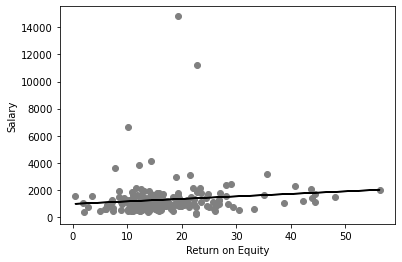

In [8]:
# Scatter plot and fitted values:
plt.plot('roe', 'salary', data = ceosal1, color = 'grey',
        marker = 'o', linestyle = '')
plt.plot(ceosal1['roe'], results.fittedvalues, 
         color = 'black', linestyle = '-')
plt.ylabel('Salary')
plt.xlabel('Return on Equity')
plt.savefig('images/simple_reg_1.png')
plt.show()
plt.close()

#### Wooldridge, Example 2.4: Wage and Education

We are using the data set *WAGE1*. We are interested in studying the relation between education and wage, and our regression models is

$$wage = \beta_0 + \beta_1 education + u$$

In the following example, we analyze the data and find that the OLS regression line is

$$\hat{wage} = -0.90 + 0.54 \cdot education$$

One additional year of education is associated with an increase of typical wage by about 54 cents an hour.

In [ ]:
# Import modules
import wooldridge as woo
import statsmodels.forumla.api as smf

In [ ]:
# Loading the wage1 data set
wage1 = woo.dataWoo('wage1')

In [ ]:
# Build the OLS regression model
reg = smf.ols(formula = 'wage ~ educ', data = wage1)

# Create the model fit
results = reg.fit()

# Extract and print the estimated parameters
b = results.params
print(f'Estimated Parameters: \n{b}\n')

#### Wooldridge, Example 2.5: Voting Outcomes and Campaign Expenditures

The data set *VOTE1* contains information on campaign expenditure (*shareA* = share of campaign spending in %) and election outcomes (*voteA* = share of vote in %). The regression model

$$voteA = \beta_0 + \beta_1 shareA + u$$

is estimated in the following example. The OLS regression line turns out to be 

$$\hat{voteA} = 26.81 + 0.464 \cdot shareA$$

We can also plot the regression line (fitted values) in the scatter plot with the actual data points using the **plot()** command.

In [ ]:
# Import modules
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# Load the vote1 data set
vote1 =woo.dataWoo('vote1')

In [ ]:
# Build the OLS regression model
reg = smf.ols(formula = 'voteA ~ shareA', data = vote1)

# Create the model fit
results = reg.fit()

# Extract and print the estimated parameters
b = results.params
print(f'Estimated Parameters: \n{b}\n')

In [ ]:
# Create scatter plot with the fitted values
plt.plot('shareA', 'voteA', data = vote1,
        color = 'grey', marker = 'o', linestyle = '')
plt.plot(vote1['shareA'], results.fittedvalues,
        color = 'black', linestyle = '-')
plt.ylabel('Share of Vote in %')
plt.xlabel('Share of Campaign Spending in %')
plt.show()
plt.savefig('images/example_2.5.png')
plt.close()

### Coefficients, Fitted Values, and Residuals

The object returned by the model **fit** contains all relevant information on the regression. Since this information is distributed across multiple object local variables of the returned object, we can access them with the syntax **resultobject.local_var_name**. After defining the regression results object **result** in previous examples. For instance, we can access the OLS coefficients with

``` Python
results.params
```

The coefficient object has names attached to its elements. The name of the intercept parameter $\hat{\beta}_0$ is **Intercept** and the name of the slope parameter $\hat{\beta}_1$ is the variable name of the regressor **x**. In this way, we can access the parameters separately by using either the position (0 or 1) or the name as an index to the coefficients object. For example, we can access intercept and slope parameter by

``` Python
# Intercept parameter
b[0]

# Slope parameter
b['roe']
```

Given these parameter estimates, calculating the predicted values $\hat{y}_i$ and residual $\hat{u}_i$ for each observation $i = 1, 2, 3, ..., n$ is easy:

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_i$$

$$\hat{u}_i = y_i - \hat{y}_i$$

If the values of the dependent and independet variables are stored in a data frame **dataset** as **y** and **x** respectively, we can estimate the model and do the calculations fo these equations for all observations jointly using the code:

``` Python
reg = smf.ols(formula = 'y ~ x', data = dataset)
results = reg.fit()
b = results.params
y_hat = b[0] + b[1] * dataset['x']
u_hat = dataset['y'] - y_hat
```

We can also use a more black-box approach which will give exactly the same result using the precalculated variables **fittedvalues** and **resid** on the regression result object:

``` Python
reg = smf.ols(formula = 'y ~ x', data = dataset)
results = reg.fit()
y_hat = results.fittedvalues
u_hat = results.resid
```

#### Wooldridge, Example 2.6: CEO Salary and Return on Equity

We extend the regression example on the return on equity of a firm and the salary of its CEO in Example 2.3. After the OLS regression, we calculate fitted values and residuals. A table similar to Wooldridge (2019, Table 2.2) is generated displaying the values for the first 15 observations. 

In [ ]:
# Import modules
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
# Load the CEOSAL1 data set 
ceosal1 = woo.dataWoo('ceosal1')

In [ ]:
# Build the OLS regression model and create model fit
reg = smf.ols(formula = 'salary ~ roe', data = ceosal1)
results = reg.fit()

In [ ]:
# Obtain predicted values and residuals
salary_hat = results.fittedvalues
u_hat = results.resid

In [ ]:
# Create Wooldridge, Table 2.2
table = pd.DataFrame({'roe': ceosal1['roe'],
                     'salary': ceosal1['salary'],
                     'Predicted Salary': salary_hat,
                     'Residual': u_hat})
print(f'Table 2.2: \n{table.head(15)}\n')

Wooldridge (2019, Section 2.3) presents and discusses three properties of OLS statistics which we will confirm for an example.

Property (1):
$$\sum_{i = 1}^{n} \hat{u}_i = 0 \Rightarrow \bar{u}_i = 0$$

Property (2):
$$\sum_{i = 1}^{n} x_i \hat{u}_i =0 \Rightarrow Cov(x_i, \hat{u}_i) = 0$$

Property (3):
$$\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot \bar{x}$$


#### Wooldridge, Example 2.7: Wage and Education

We alreayd know the regression results when we regress wage on education form Example 2.4. In this example, we calculate fitted values and residuals to confirm the three properties from three equations. Note that *Python* does all calculations in "double precision" implying that it is accurate for at least 15 significant digits. The output that checks the first property shows that the average residual is -7.564713e-15 which in scientific notation means $-7.564713 \cdot 10^{-15} = -0.000000000000007564713$. The reason it is not exactly equal to 0 is a rounding error in the 16th digit. The same holds for the second property: The covariance between the regressor and the residual is zero except for minimal rounding error. Note that running the following code will give you the same accurate digits, but the digits with rounding error will differ. The third property is also confirmed: if we plug the average value of the regressor into the regression line formula, we get the average value of the dependent variable.

In [ ]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
# Loading the wage1 data set
wage1 = woo.dataWoo('wage1')

# Build the OLS regression model
reg = smf.ols(formula = 'wage ~ educ', data = wage1)

# Create the model fit
results = reg.fit()

# Obtain coefficients, predicted values and residuals
b = results.params
wage_hat = results.fittedvalues
u_hat = results.resid

In [ ]:
# Confirm property (1)
u_hat_mean = np.mean(u_hat)
print(f'Average Residuals: {u_hat_mean}\n')

In [ ]:
# Confirm property (2)
educ_u_cov = np.cov(wage1['educ'], u_hat)[1, 0]
print(f'Covariance between Education and Residuals: {educ_u_cov}\n')

In [ ]:
# Confirm property (3)
educ_mean = np.mean(wage1['educ'])
wage_pred = b[0] + b[1] * educ_mean
print(f'Predicted Average Wage: {wage_pred}\n')

wage_mean = np.mean(wage1['wage'])
print(f'actual Average Wage: {wage_mean}\n')

### Goodness of Fit

The total sum of squares (SST), explained sum of squares (SSE) and residual sum of squares (SSR) can be written as

$$SST = \sum_{i = 1}^n (y_i - \bar{y})^2 = (n - 1) \cdot Var(y)$$

$$SSE = \sum_{i = 1}^n (\hat{y}_i - \bar{y})^2 = (n - 1) \cdot Var(\hat{y})$$

$$SSR = \sum_{i = 1}^n (\hat{u}_i - 0)^2 = (n - 1) \cdot Var(\hat{u})$$

where Var(x) is the sample variance $\frac{1}{n - 1} \sum_{i = 1}^n(x_i - \bar{x})^2$.

Wooldridge (2019, Equation 2.38) defines the coefficient of determination in terms of these terms. Because (n - 1) cancels out, it can be equivalently written as 

$$R^2 = \frac{Var(\hat{y})}{Var(y)} = 1 - \frac{Var(\hat{u})}{Var(y)}$$

#### Wooldridge, Example 2.8: CEO Salary and Return on Equity

In the regression alreayd studied in Example 2.6, the coefficient of determination is 0.0132. This is calculated in the two ways of $R^2$ equation in the following example. In addition, it is calculated as the squared correlation coefficient of $y$ and $\hat{y}$. Not surprisingly, all versions of these calculations produce the same result (they are not exactly equal to each other because of the rounding error in the 16th digit).

In [ ]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
# Load the CEOSAL1 data set 
ceosal1 = woo.dataWoo('ceosal1')

# Build the OLS regression model and create model fit
reg = smf.ols(formula = 'salary ~ roe', data = ceosal1)
results = reg.fit()

# Obtain predicted values and residuals
salary_hat = results.fittedvalues
u_hat = results.resid

In [ ]:
# Calculate R^2 in three different ways:
sal = ceosal1['salary']
R2_a = np.var(salary_hat, ddof = 1) / np.var(sal, ddof = 1)
R2_b = 1 - np.var(u_hat, ddof = 1) / np.var(sal, ddof = 1)
R2_c = np.corrcoef(sal, salary_hat)[1, 0] ** 2

# Print the results
print(f'R Square Method A: {R2_a}\n')
print(f'R Square Method B: {R2_b}\n')
print(f'R Square Method C: {R2_c}\n')

Many interesting results for a regression can be displayed by calling the method **summary()**. You call this method on the object returned by the method **fit()**. The output will display

- A block of general information about the regression model. It contains also other information about the estimation of which only $R^2$ is of interest to us so far. It is reported as **R-squared**.
- A coefficient table. So far, we only discussed the OLS coefficients shown in the first column. The next columns will be introducd below.
- A block of diagnostics regarding the residuals. We will discuss some of them later.

When we are only interested in the coefficients and their significance, we will often switch to a more compact presentation of results. This is demonstrated with the object **table** in this example.

In [ ]:
# Import modules
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
# Load the vote1 data set
vote1 =woo.dataWoo('vote1')

# Build the OLS regression model
reg = smf.ols(formula = 'voteA ~ shareA', data = vote1)

# Create the model fit
results = reg.fit()

In [ ]:
# Print results using summary
print(f'Summary Output: \n{results.summary()}\n')

# Print regression table
table = pd.DataFrame({Parameters: round(results.params, 4),
                     Standard Errors: round(results.bse, 4),
                     t-values: round(results.tvalues, 4),
                     p-values: round(results.pvalues, 4)})
print(f'Regression Table: \n{table}\n')

### Nonlinearities

For the estimation of logarithmic or semi-logarithmic models, the respective formula can be directly entered into the specification of **smf.ols()** as demonstrated in the following examples. For the interpretation as percentage effects and elasticities, see Wooldridge (2019, Section 2.4).

#### Wooldridge, Example 2.10: Wage and Education

Compared to Example 2.7, we simply change the commnad for estimation to account for a logarithmic specification. The semi-logarithmic specification implies that wages are higher by about 8.3% for indivdiual with an additional year of education.

$$log(wage) = \beta_0 + \beta_1 education + u$$

In [ ]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
# Loading the wage1 data set
wage1 = woo.dataWoo('wage1')

In [ ]:
# Estimate log-level model
reg = smf.ols(formula = 'np.log(wage) ~ educ', data = wage1)
results = reg.fit()
b = results.params
print(f'Estimated Parameters: \n{b}\n')

#### Wooldridge, Example 2.11: CEO Salary and Firm Sales

We study the relationship between the sales of a firm and the salary of its CEO using a log-log specification. The result suggests that if sales increase by 1%, the salary of the CEO tends to increase by 0.257%.

$$log(salary) = \beta_0 + \beta_1 log(sales) + u$$

In [ ]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

In [ ]:
# Load the CEOSAL1 data set 
ceosal1 = woo.dataWoo('ceosal1')

In [ ]:
# Estimate log-log model
reg = smf.ols(formula = 'np.log(salary) ~ np.log(sales)', data = ceosal1)
results = reg.fit()
b = results.params
print(f'Estimated Parameters: \n{b}\n')

### Regression through the Origin and Regression on a Constant

Wooldridge (2019, Section 2.6) discusses models without an intercept. This implies that the regression line is forced to go through the origin. In *Python*, we can suppress the constant which is otherwise implicitly added to a formula by specifiying

``` Python
smf.ols('y ~ 0 + x', data = dataset)
```

instead of **smf.ols('y ~ x', data = dataset)**. The result is a model which only has a slope parameter.

Another topic discussed in this section is a linear regression model without a slope parameter, i.e. with a constant only. In this case, the estimated constant will be the sample average of the dependent variable. This can be implemented in *Python* using the code

``` Python
smf.ols('y ~ 1', data = dataset)
```

Both special kinds of regression are implemented for the example of the CEO salary and ROE we already analyzed in Example 2.8 and others. The resulting regression lines are plotted which was generated using the last lines of code shown in the output.

In [2]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
# Load the CEOSAL1 data set 
ceosal1 = woo.dataWoo('ceosal1')

In [4]:
# Usual OLS regression
reg1 = smf.ols(formula = 'salary ~ roe', data = ceosal1)
results1 = reg1.fit()
b1 = results1.params
print(f'Estimated Parameters: \n{b1}\n')

Estimated Parameters: 
Intercept    963.191336
roe           18.501186
dtype: float64



In [5]:
# Regression without intercept (through origin)
reg2 = smf.ols(formula = 'salary ~ 0 + roe', data = ceosal1)
results2 = reg2.fit()
b2 = results2.params
print(f'Estimated Parameters: \n{b2}\n')

Estimated Parameters: 
roe    63.537955
dtype: float64



In [6]:
# Regression without slope (on a constant)
reg3 = smf.ols(formula = 'salary ~ 1', data = ceosal1)
results3 = reg3.fit()
b3 = results3.params
print(f'Estimated Parameters: \n{b3}\n')

Estimated Parameters: 
Intercept    1281.119617
dtype: float64



In [7]:
# Average salary
sal_mean = np.mean(ceosal1['salary'])
print(f'Average Salary: \n{sal_mean}\n')

Average Salary: 
1281.1196172248804



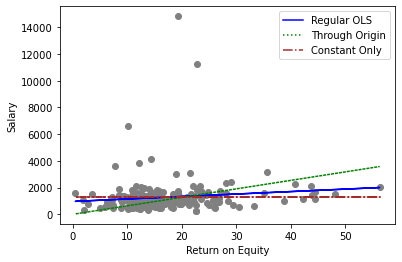

In [10]:
# Scatter plot and fitted values:
plt.plot('roe', 'salary', data = ceosal1, color = 'grey',
        marker = 'o', linestyle = '', label = '')
plt.plot(ceosal1['roe'], results1.fittedvalues, color = 'blue',
        linestyle = '-', label = 'Regular OLS')
plt.plot(ceosal1['roe'], results2.fittedvalues, color = 'green',
        linestyle = ':', label = 'Through Origin')
plt.plot(ceosal1['roe'], results3.fittedvalues, color = 'brown',
        linestyle = '-.', label = 'Constant Only')
plt.ylabel('Salary')
plt.xlabel('Return on Equity')
plt.legend()
plt.show()
plt.savefig('images/slr-origin-const.png')
plt.close()

### Expected Values, Variances, and Standard Errors

Wooldridge (2019) discusses the role of the five assumptions under which the OLS parameter estimators have desirable properties. In short form they are

- **SLR.1**: Linear population regression function: $y = \beta_0 + \beta_1 x + u$
- **SLR.2**: Random sampling of *x* and *y* from the population
- **SLR.3**: Variation in the sample values $x_1, x_2, ..., x_n$
- **SLR.4**: Zero conditional mean: $E(u|x) = 0$
- **SLR.5**: Homoscedasticity: $Var(u|x) = \sigma^2$

Based on those, Wooldridge (2019) shows in Section 2.5:

- **Theorem 2.1**: Under **SLR.1 - SLR.4**, OLS parameter estimators are unbiased.
- **Theorem 2.2**: Under **SLR.1 - SLR.5**, OLS parameter estimators have a specific sampling variance.

Because the formulas for the sampling variance involve the variance of the error term, we also have to estimate it using the unbiased estimator

$$\hat{\sigma}^2 = \frac{1}{n - 2} \cdot \sum_{i = 1}^{n} \hat{u}_i^2 = \frac{n - 1}{n - 2} \cdot Var(\hat{u}_i)$$

where $Var(\hat{u}_i) = \frac{1}{n - 1} \cdot \sum_{i = 1}^{n} \hat{u}_i^2$ is the usual sample variance. We have to use the degrees-of-freedom adjustment to account for the fact that we estimated the two parameters $\hat{\beta}_0$ and $\hat{\beta}_1$ for constructing the residuals. Its square root $\hat{\sigma} = \sqrt{\hat{\sigma}^2}$ is called standard error of the regression (SER) by Wooldridge (2019).

The **standard errors (SE) of the estimators** are

$$se(\hat{\beta}_0) = \sqrt{\frac{\hat{\sigma}^2 \bar{x^2}}{\sum_{i = 1}^n (x - \bar{x})^2}} = \frac{1}{\sqrt{n - 1}} \cdot \frac{\hat{\sigma}}{sd(x)} \cdot \sqrt{\bar{x^2}}$$

$$se(\hat{\beta}_1) = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i = 1}^n (x - \bar{x})^2}} = \frac{1}{\sqrt{n - 1}} \cdot \frac{\hat{\sigma}}{sd(x)}$$

where $sd(x)$ is the same standard deviation $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$.

In *Python*, we can obviously evaluate the standard error equations explicitly. But the output of the **summary** command for linear regression results already contains these values. We use the following example to calculate the results in both ways to open the black box of the canned routine and convince ourselves that form now on we can rely on it.

#### Wooldridge, Example 2.12: Student Math Performance and the School Lunch Program

Using the data set *MEAP93*, we regress a math performance score of schools on the share of students eligible for a federally funded lunch program. Wooldridge (2019) uses this example to demonstrate the importance of assumption SLR.4 and warns us against inerpreting the regression results in a causal way. Here we merely use the example to demonstrate the calculation of standard errors.

First we calculate the SER manually using the fact that the residuals $\hat{u}$ are available as **results.resid**. Then, the SE of the parameters are calculated according to the given SE equations, where the regressor is addressed as the variable in the data frame **meap93['lnchprg']**. Finally, we see the output of the **summary** method. The SE of the parameters are reported in teh second column of the regression table, next to the parameter estimates. We will look at the other colmuns later. All values are exactly the same as the manual results.

In [11]:
# Import modules
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

In [12]:
# Load the data set 'meap93'
meap93 = woo.dataWoo('meap93')

In [13]:
# Estimate the model and save the results
reg = smf.ols(formula = 'math10 ~ lnchprg', data = meap93)
results = reg.fit()

In [14]:
# Number of observations
n = results.nobs

In [15]:
# Calculate SER 
u_hat_var = np.var(results.resid, ddof = 1)
ser = np.sqrt(u_hat_var) * np.sqrt((n - 1) / (n - 2))
print(f'Standard Error of the Regressor: {ser}\n')

Standard Error of the Regressor: 9.565938459482764



In [16]:
# Calculate SE of beta0 and beta1, respectively
lnchprg_sq_mean = np.mean(meap93['lnchprg']**2)
lnchprg_var = np.var(meap93['lnchprg'], ddof = 1)
b1_se = ser / (np.sqrt(lnchprg_var) * np.sqrt(n - 1)) * np.sqrt(lnchprg_sq_mean)
b0_se = ser / (np.sqrt(lnchprg_var) * np.sqrt(n - 1))

print(f'Standard Error of Beta0: {b0_se}\n')
print(f'Standard Error of Beta1: {b1_se}\n')

Standard Error of Beta0: 0.034839334258369645

Standard Error of Beta1: 0.9975823856755016



In [17]:
# Automatic calculations using summary method
print(f'Regression Summary Table: \n{results.summary()}\n')

Regression Summary Table: 
                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Thu, 06 May 2021   Prob (F-statistic):           2.75e-18
Time:                        21:42:10   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1427    

### Monte Carlo Simulations

